In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.decomposition import PCA

In [2]:
# step 1 read csv file
df = pd.read_csv(r'C:\DATA_SCIENCE\machine_learning\Dataset\Lung_Cancer_Dataset.csv')

In [3]:
# step 2 display few row of the dataset
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
0   68       1        1                     1              1   
1   81       1        1                     0              0   
2   58       1        1                     0              0   
3   44       0        1                     0              1   
4   72       0        1                     1              1   

   EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  IMMUNE_WEAKNESS  \
0                      1                  0     57.831178                0   
1                      1                  1     47.694835                1   
2                      0                  0     59.577435                0   
3                      1                  0     59.785767                0   
4                      1                  1     59.733941                0   

   BREATHING_ISSUE  ALCOHOL_CONSUMPTION  THROAT_DISCOMFORT  OXYGEN_SATURATION  \
0                0                  

In [4]:
# step 3 data describe 
print("here is the data describe:")
print(df.describe())

here is the data describe:
               AGE       GENDER      SMOKING  FINGER_DISCOLORATION  \
count  5000.000000  5000.000000  5000.000000             5000.0000   
mean     57.222800     0.501200     0.666400                0.6012   
std      15.799224     0.500049     0.471546                0.4897   
min      30.000000     0.000000     0.000000                0.0000   
25%      44.000000     0.000000     0.000000                0.0000   
50%      57.000000     1.000000     1.000000                1.0000   
75%      71.000000     1.000000     1.000000                1.0000   
max      84.000000     1.000000     1.000000                1.0000   

       MENTAL_STRESS  EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  \
count    5000.000000            5000.000000        5000.000000   5000.000000   
mean        0.539800               0.516000           0.439200     55.032043   
std         0.498463               0.499794           0.496339      7.913083   
min         0.000000  

In [5]:
#step 4 data information
print("here is the data infromation:")
print(df.info())


here is the data infromation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HIS

In [7]:
# Step 5 check missing values
print("\nTo check missing values:")
print(df.isnull().sum())


To check missing values:
AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64


In [8]:
# step 6 sample data
print("Here is the sample data:")
print(df.sample(6))


Here is the sample data:
      AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
802    82       0        0                     1              0   
4266   80       0        1                     0              0   
607    39       0        1                     0              1   
940    67       0        1                     1              0   
69     65       0        1                     0              0   
1985   68       1        0                     1              1   

      EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  IMMUNE_WEAKNESS  \
802                       0                  0     54.845772                1   
4266                      1                  0     65.165140                0   
607                       0                  1     41.034395                0   
940                       0                  1     52.284569                0   
69                        1                  0     43.114756                1   
1985               

In [9]:
# Step 7 Explore the dataset
# Check the distribution of the target variable (PULMONARY_DISEASE)
print("\nDistribution of the target variable (PULMONARY_DISEASE):")
print(df['PULMONARY_DISEASE'].value_counts())


Distribution of the target variable (PULMONARY_DISEASE):
PULMONARY_DISEASE
NO     2963
YES    2037
Name: count, dtype: int64


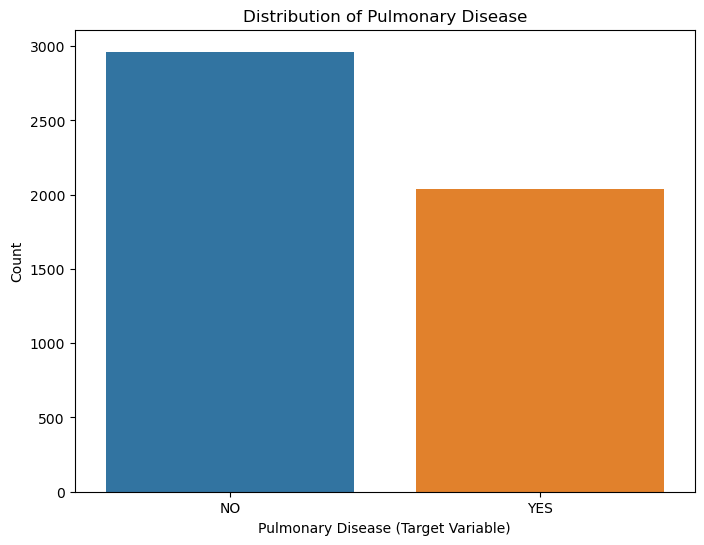

In [10]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='PULMONARY_DISEASE', data=df)
plt.title('Distribution of Pulmonary Disease')
plt.xlabel('Pulmonary Disease (Target Variable)')
plt.ylabel('Count')
plt.show()


In [11]:
# Step 8: Preprocess the data
# Convert categorical variables to numerical using Label Encoding
categorical_columns = ['GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS', 'EXPOSURE_TO_POLLUTION', 
                       'LONG_TERM_ILLNESS', 'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION', 
                       'THROAT_DISCOMFORT', 'CHEST_TIGHTNESS', 'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 
                       'STRESS_IMMUNE']

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Convert the target variable to binary (1 = YES, 0 = NO)
df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].apply(lambda x: 1 if x == 'YES' else 0)


In [12]:
# Step 9: Split the dataset into features (X) and target (y)
X = df.drop('PULMONARY_DISEASE', axis=1)  # Features
y = df['PULMONARY_DISEASE']  # Target variable


In [13]:
# Step 10: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Step 11: Scale the features (normalize/standardize)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = scaler.transform(X_test)  # Transform the testing data using the same scaler

# Display the shapes of the training and testing sets
print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



Training set shape: (4000, 17) (4000,)
Testing set shape: (1000, 17) (1000,)


In [15]:
# Step 12: Train the models
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True, random_state=42)  # Enable probability for ROC-AUC
svm.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

print("\nModels trained successfully!")


Models trained successfully!


In [19]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy:", accuracy)

    # Classification Report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print("\nROC-AUC Score:", roc_auc)
    
     # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()


Evaluating Random Forest:
Random Forest Accuracy: 0.913

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       571
           1       0.90      0.89      0.90       429

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000


Confusion Matrix:
[[530  41]
 [ 46 383]]

ROC-AUC Score: 0.9340624349380917


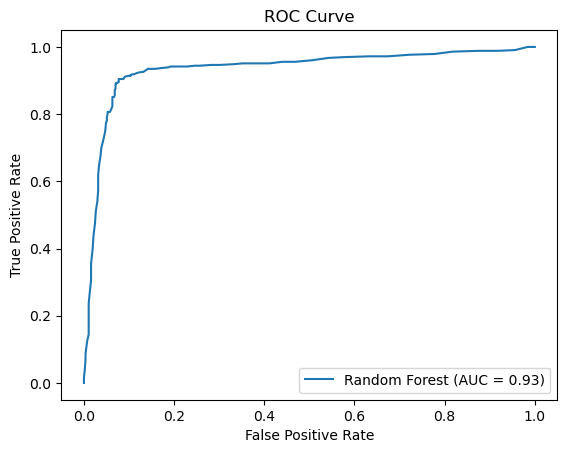

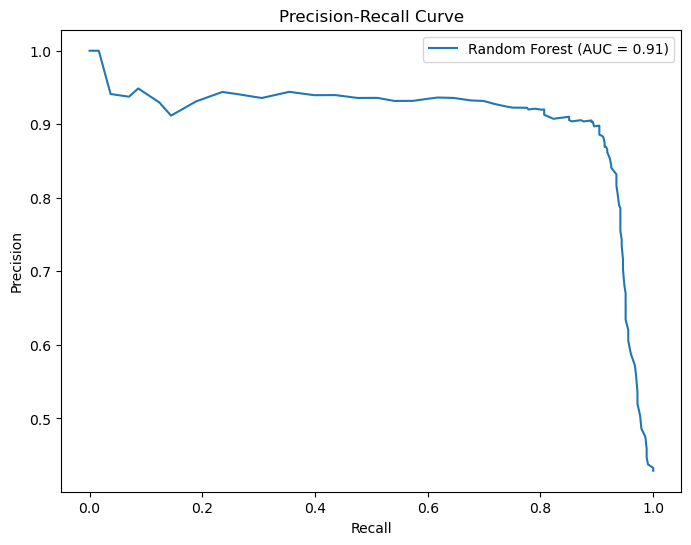

In [20]:
# Evaluate Random Forest
print("\nEvaluating Random Forest:")
evaluate_model(rf, X_test, y_test, "Random Forest")


Evaluating Support Vector Machine (SVM):
SVM Accuracy: 0.893

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       571
           1       0.86      0.90      0.88       429

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000


Confusion Matrix:
[[508  63]
 [ 44 385]]

ROC-AUC Score: 0.9340338587273789


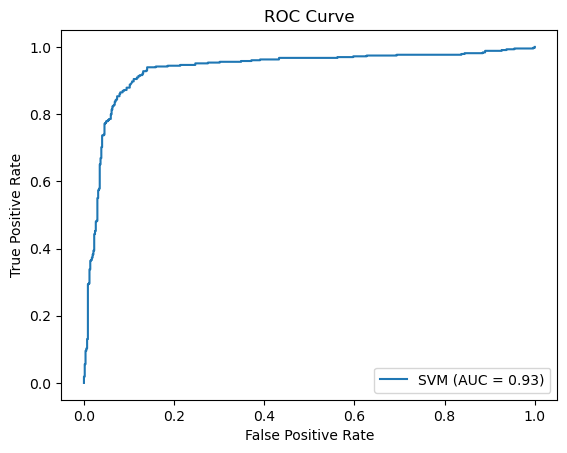

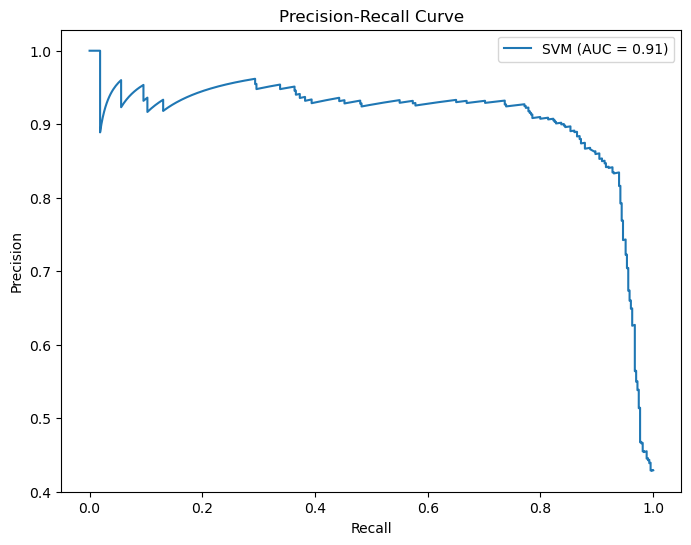

In [21]:
# Evaluate SVM
print("\nEvaluating Support Vector Machine (SVM):")
evaluate_model(svm, X_test, y_test, "SVM")


Evaluating XGBoost:
XGBoost Accuracy: 0.896

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       571
           1       0.87      0.89      0.88       429

    accuracy                           0.90      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.90      0.90      0.90      1000


Confusion Matrix:
[[516  55]
 [ 49 380]]

ROC-AUC Score: 0.926203976992068


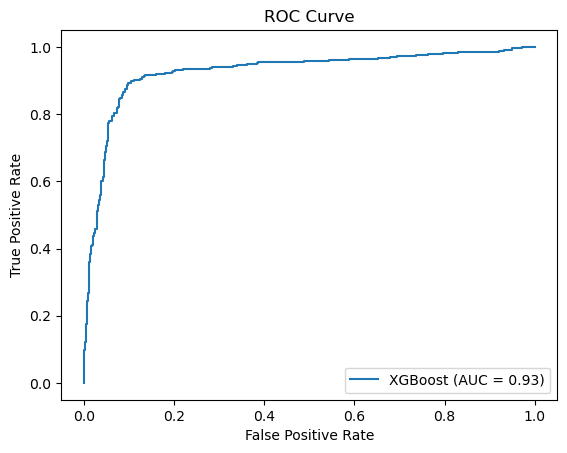

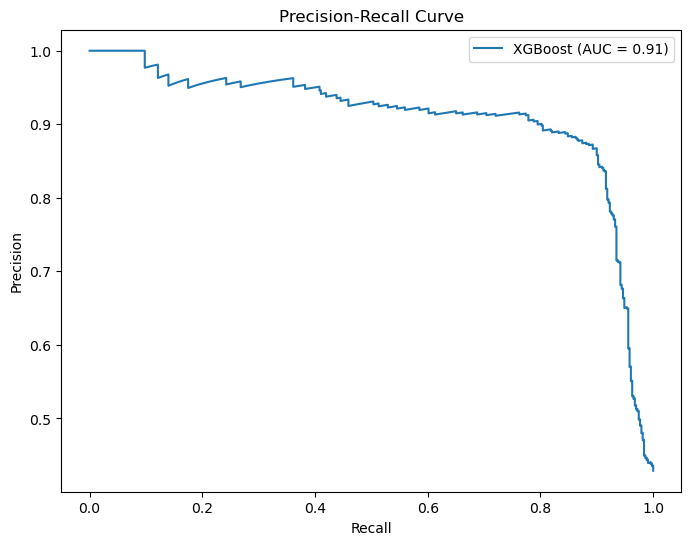

In [24]:
# Evaluate XGBoost
print("\nEvaluating XGBoost:")
evaluate_model(xgb, X_test, y_test, "XGBoost")

# Show the ROC Curve
plt.show()


In [25]:
# Step 14: Feature Importance (for Random Forest and XGBoost)
# Random Forest Feature Importance
rf_feature_importance = rf.feature_importances_
rf_feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importance})
rf_feature_df = rf_feature_df.sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(rf_feature_df.head(10))  # Display top 10 important features



Random Forest Feature Importance:
                   Feature  Importance
2                  SMOKING    0.197349
7             ENERGY_LEVEL    0.155052
11       THROAT_DISCOMFORT    0.112964
9          BREATHING_ISSUE    0.104616
12       OXYGEN_SATURATION    0.097746
0                      AGE    0.084745
15  SMOKING_FAMILY_HISTORY    0.049217
16           STRESS_IMMUNE    0.034435
5    EXPOSURE_TO_POLLUTION    0.030478
14          FAMILY_HISTORY    0.020609


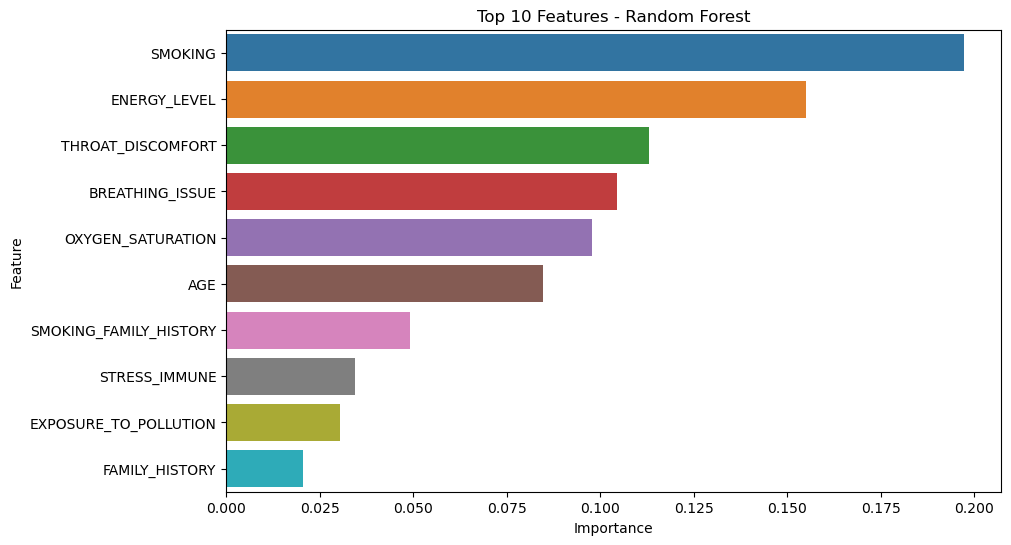

In [26]:
# Plot Random Forest Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_df.head(10))
plt.title('Top 10 Features - Random Forest')
plt.show()


XGBoost Feature Importance:
                  Feature  Importance
2                 SMOKING    0.390396
9         BREATHING_ISSUE    0.157433
11      THROAT_DISCOMFORT    0.135435
16          STRESS_IMMUNE    0.087181
14         FAMILY_HISTORY    0.062794
5   EXPOSURE_TO_POLLUTION    0.037157
7            ENERGY_LEVEL    0.017997
12      OXYGEN_SATURATION    0.012119
13        CHEST_TIGHTNESS    0.012039
8         IMMUNE_WEAKNESS    0.011875


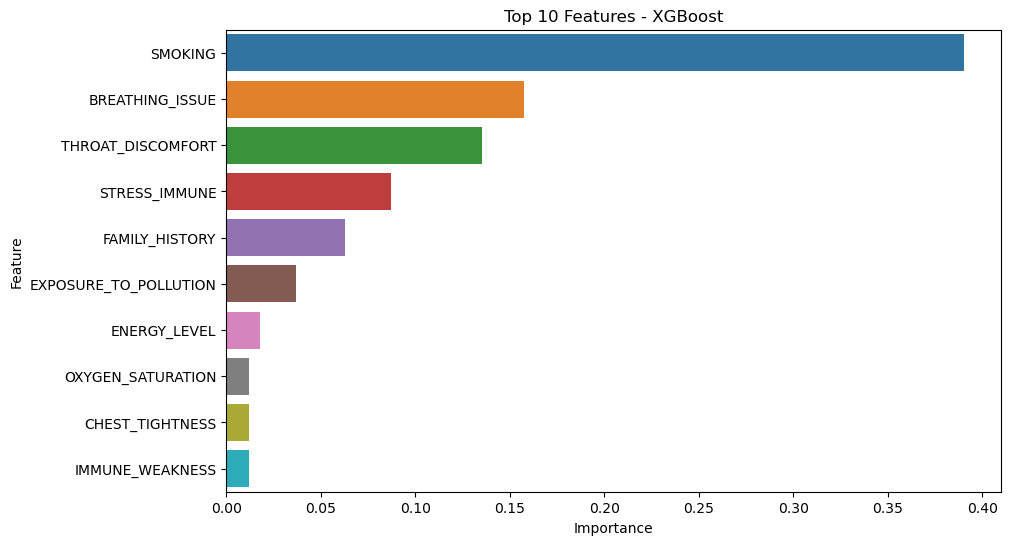

In [28]:
# XGBoost Feature Importance
xgb_feature_importance = xgb.feature_importances_
xgb_feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_feature_importance})
xgb_feature_df = xgb_feature_df.sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importance:")
print(xgb_feature_df.head(10))  # Display top 10 important features

# Plot XGBoost Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_df.head(10))
plt.title('Top 10 Features - XGBoost')
plt.show()

# Additional Visualizations

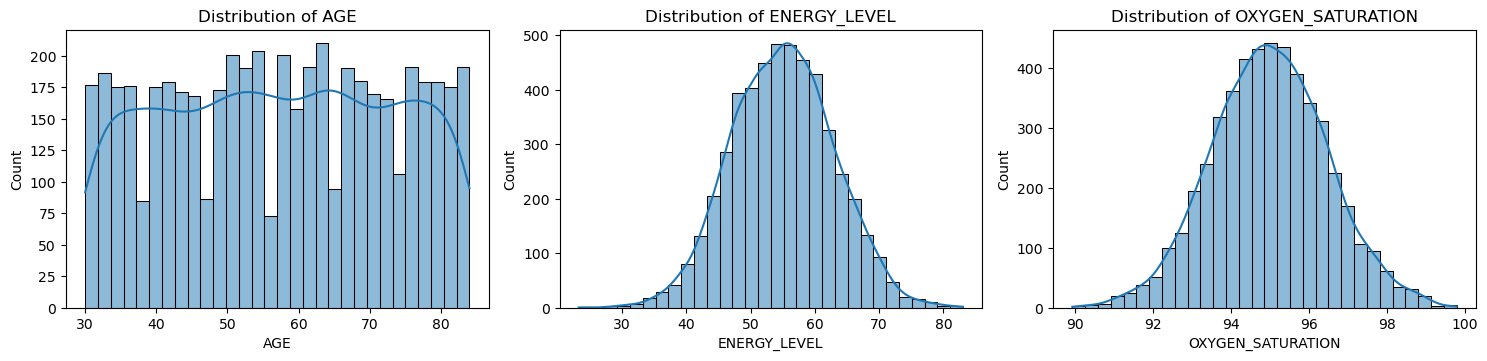

In [29]:
# 1. Distribution of Numerical Features
numerical_columns = ['AGE', 'ENERGY_LEVEL', 'OXYGEN_SATURATION']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

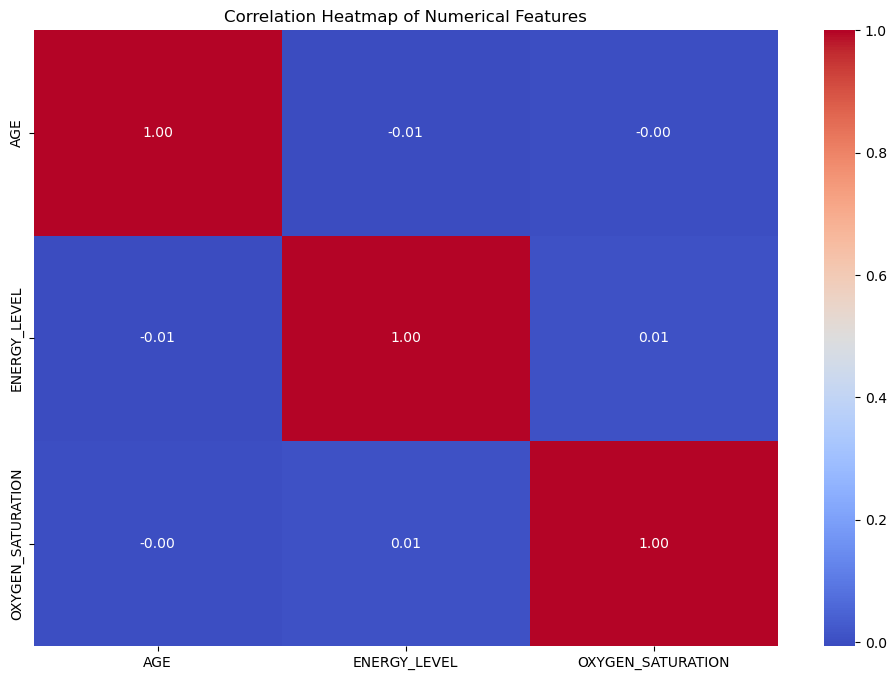

In [30]:
# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df[numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

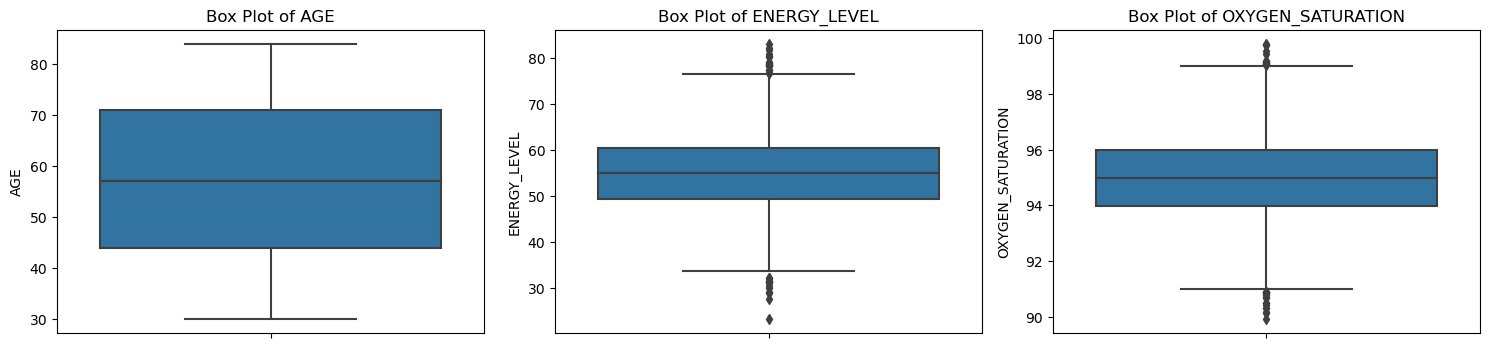

In [31]:
# 3. Box Plots for Numerical Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


C:\Users\chite\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


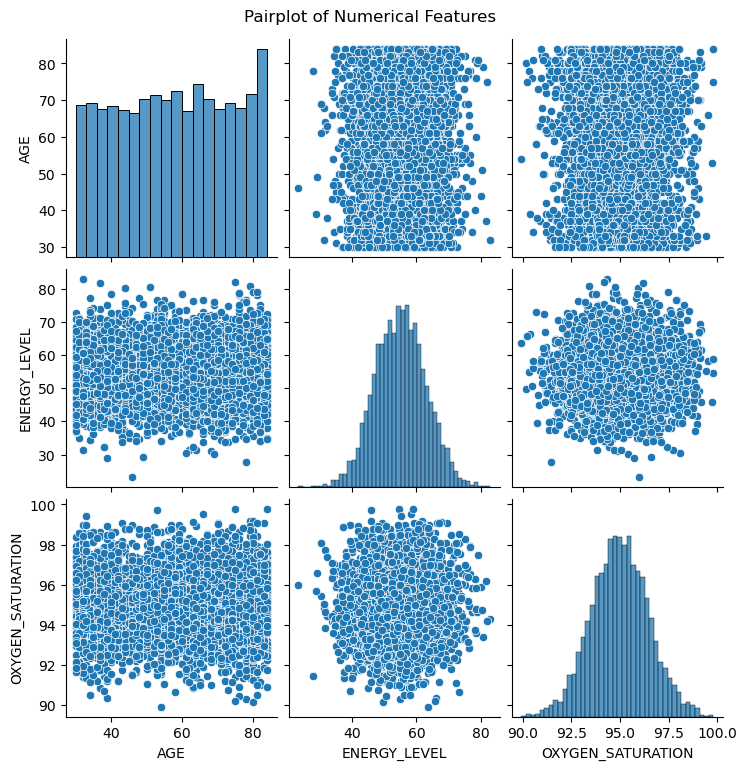

In [32]:
# 4. Pairplot for Numerical Features
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

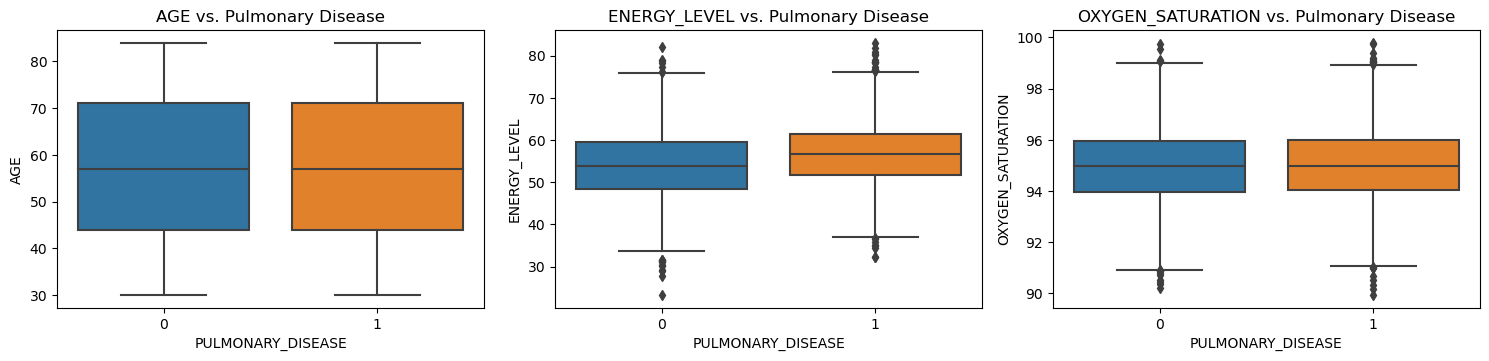

In [33]:
# 5. Target Variable vs. Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df['PULMONARY_DISEASE'], y=df[col])
    plt.title(f'{col} vs. Pulmonary Disease')
plt.tight_layout()
plt.show()

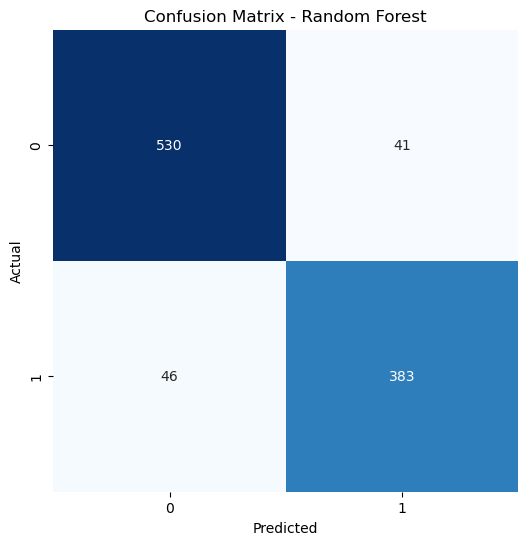

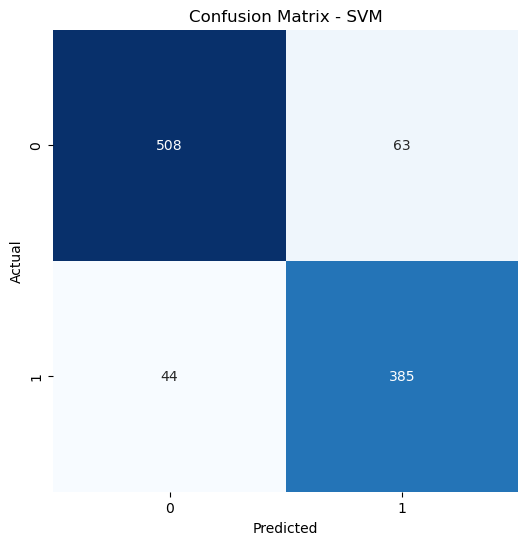

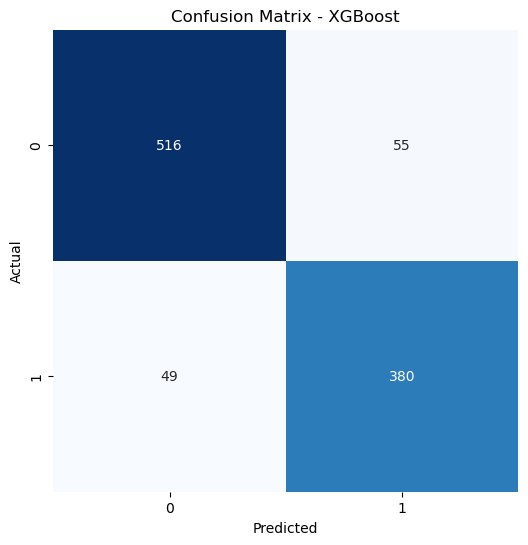

In [34]:
# 6. Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, rf.predict(X_test), "Random Forest")
plot_confusion_matrix(y_test, svm.predict(X_test), "SVM")
plot_confusion_matrix(y_test, xgb.predict(X_test), "XGBoost")

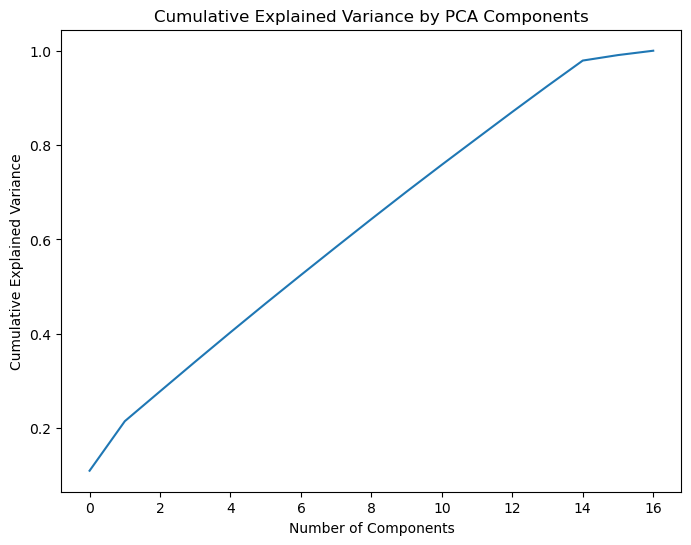

In [35]:
# 7. Cumulative Explained Variance (PCA)
pca = PCA()
pca.fit(X_train)

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.show()

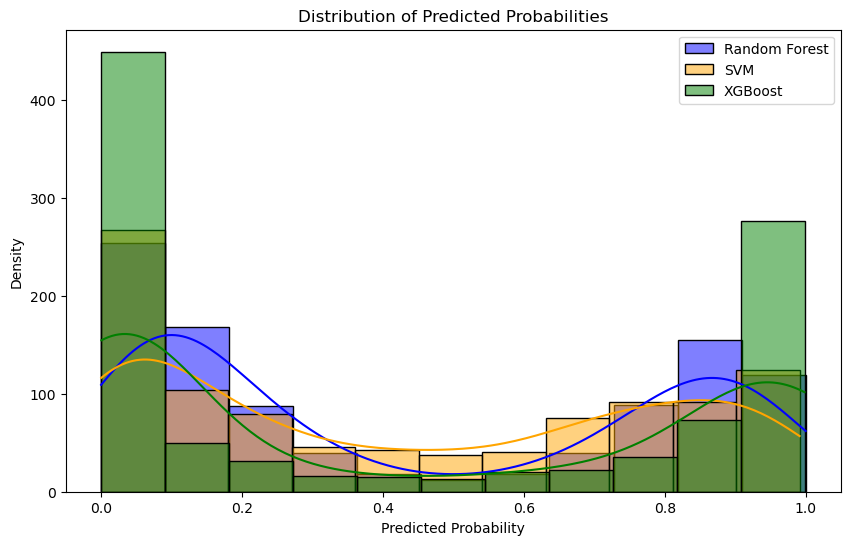

In [36]:
# 8. Distribution of Predicted Probabilities
plt.figure(figsize=(10, 6))
sns.histplot(rf.predict_proba(X_test)[:, 1], kde=True, label='Random Forest', color='blue')
sns.histplot(svm.predict_proba(X_test)[:, 1], kde=True, label='SVM', color='orange')
sns.histplot(xgb.predict_proba(X_test)[:, 1], kde=True, label='XGBoost', color='green')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()